## Import the libraries

In [1]:
import pickle
import pandas as pd

## Import the final dataset

In [2]:
import pickle
import pandas as pd

# Unpickle
with open('Datasets/df_2018_to_2021_raw_with_extra_features.pkl', 'rb') as f:
    df = pickle.load(f)


In [3]:
df.head(2)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings
0,22018,203500,Steven Adams,0021801226,2019-04-10,OKC @ MIL,OKC,MIL,0,1,...,4,2,0,0,0,1,0,1,4,13.453
1,22018,203500,Steven Adams,0021801218,2019-04-09,OKC vs. HOU,OKC,HOU,1,1,...,4,8,5,1,0,0,0,1,8,17.227


## Include double-double and triple-double features

DraftKings criteria:
- Double-double (max 1 per player): 
    - Points, Rebounds, Assists, Blocks, Steals
- Triple-double (max 1 per player): 
    - Points, Rebounds, Assists, Blocks, Steals

In [4]:
def get_double_and_triple_doubles(player_info):
    points = player_info['Points']
    rebounds = player_info['Offensive Rebounds'] + player_info['Defensive Rebounds']
    assists = player_info['Assists']
    blocks = player_info['Blocks']
    steals = player_info['Steals']

    stats = [points, rebounds, assists, blocks, steals]

    cnt = 0
    for stat in stats:
        if int(stat) >= 10:
            cnt += 1

    if cnt >= 3:
        return 'Triple-double'
    elif cnt == 2:
        return 'Double-double'
    else: 
        return None

### Testing the function

In [6]:
# This player, in this game, should get a double-double (assists and points)
df[(df['Assists'] > 10) & (df['Points'] > 10)].head(3)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings
504,22018,203507,Giannis Antetokounmpo,0021800854,2019-02-13,MIL @ IND,MIL,IND,0,1,...,10,7,12,11,2,1,2,1,33,59.145
511,22018,203507,Giannis Antetokounmpo,0021800750,2019-01-29,MIL @ DET,MIL,DET,0,1,...,5,1,7,11,3,2,2,5,21,41.061
549,22018,203507,Giannis Antetokounmpo,0021800133,2018-11-04,MIL vs. SAC,MIL,SAC,1,1,...,12,3,12,11,1,1,5,3,26,47.679


In [9]:
df[(df['Assists'] > 10) & (df['Points'] > 10)].iloc[1]

Season ID                                      22018
Player ID                                     203507
Player Name                    Giannis Antetokounmpo
Game ID                                   0021800750
Game Date                        2019-01-29 00:00:00
Matchup                                    MIL @ DET
Player Team                                      MIL
Opponent                                         DET
Home                                               0
Won                                                1
Minutes played                                    35
Field Goals Made                                   8
Field Goals Attempted                             16
Field Goals 3 Points Made                          1
Field Goal 3 Points Attempt                        4
Free Throws Made                                   4
Free Throws Attempt                                5
Offensive Rebounds                                 1
Defensive Rebounds                            

In [10]:
test = df[(df['Assists'] > 10) & (df['Points'] > 10)].iloc[1]
get_double_and_triple_doubles(test)

'Double-double'

In [11]:
# This player, in this game, should get a triple-double (assists, points and rebounds)
df[(df['Assists'] > 10) & (df['Points'] > 10) & (df['Offensive Rebounds'] + df['Defensive Rebounds']> 10)].head(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings
504,22018,203507,Giannis Antetokounmpo,0021800854,2019-02-13,MIL @ IND,MIL,IND,0,1,...,10,7,12,11,2,1,2,1,33,59.145


In [12]:
test = df[(df['Assists'] > 10) & (df['Points'] > 10) & (df['Offensive Rebounds'] + df['Defensive Rebounds']> 10)].head(1)
get_double_and_triple_doubles(test)

'Triple-double'

In [13]:
# This player, in this game, should get None
df.iloc[2]

Season ID                                    22018
Player ID                                   203500
Player Name                           Steven Adams
Game ID                                 0021801197
Game Date                      2019-04-07 00:00:00
Matchup                                  OKC @ MIN
Player Team                                    OKC
Opponent                                       MIN
Home                                             0
Won                                              1
Minutes played                                  27
Field Goals Made                                 4
Field Goals Attempted                            5
Field Goals 3 Points Made                        0
Field Goal 3 Points Attempt                      0
Free Throws Made                                 0
Free Throws Attempt                              0
Offensive Rebounds                               2
Defensive Rebounds                               4
Assists                        

In [14]:
test = df.iloc[2]
print(get_double_and_triple_doubles(test))

None


### Apply the function

In [15]:
df = df.reset_index(drop=True)

results = []

for index, row in df.iterrows():
    results.append(get_double_and_triple_doubles(row))

df['Double/Triple double'] = results

### Check the results

In [17]:
# This player, in this game, should get a double-double (assists and points)
df[(df['Assists'] > 10) & (df['Points'] > 10)].iloc[1]

Season ID                                      22018
Player ID                                     203507
Player Name                    Giannis Antetokounmpo
Game ID                                   0021800750
Game Date                        2019-01-29 00:00:00
Matchup                                    MIL @ DET
Player Team                                      MIL
Opponent                                         DET
Home                                               0
Won                                                1
Minutes played                                    35
Field Goals Made                                   8
Field Goals Attempted                             16
Field Goals 3 Points Made                          1
Field Goal 3 Points Attempt                        4
Free Throws Made                                   4
Free Throws Attempt                                5
Offensive Rebounds                                 1
Defensive Rebounds                            

In [18]:
# This player, in this game, should get a triple-double (assists, points and rebounds)
df[(df['Assists'] > 10) & (df['Points'] > 10) & (df['Offensive Rebounds'] + df['Defensive Rebounds']> 10)].head(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double/Triple double
504,22018,203507,Giannis Antetokounmpo,0021800854,2019-02-13,MIL @ IND,MIL,IND,0,1,...,7,12,11,2,1,2,1,33,59.145,Triple-double


In [19]:
# This player, in this game, should get None
df.iloc[2]

Season ID                                    22018
Player ID                                   203500
Player Name                           Steven Adams
Game ID                                 0021801197
Game Date                      2019-04-07 00:00:00
Matchup                                  OKC @ MIN
Player Team                                    OKC
Opponent                                       MIN
Home                                             0
Won                                              1
Minutes played                                  27
Field Goals Made                                 4
Field Goals Attempted                            5
Field Goals 3 Points Made                        0
Field Goal 3 Points Attempt                      0
Free Throws Made                                 0
Free Throws Attempt                              0
Offensive Rebounds                               2
Defensive Rebounds                               4
Assists                        

### Create the double-double and triple-double features

In [20]:
df['Double-double'] = df['Double/Triple double'].apply(lambda x: 1 if x == 'Double-double' else 0)
df['Triple-double'] = df['Double/Triple double'].apply(lambda x: 1 if x == 'Triple-double' else 0)

df.head(3)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double/Triple double,Double-double,Triple-double
0,22018,203500,Steven Adams,0021801226,2019-04-10,OKC @ MIL,OKC,MIL,0,1,...,0,0,1,0,1,4,13.453,None,0,0
1,22018,203500,Steven Adams,0021801218,2019-04-09,OKC vs. HOU,OKC,HOU,1,1,...,1,0,0,0,1,8,17.227,None,0,0
2,22018,203500,Steven Adams,0021801197,2019-04-07,OKC @ MIN,OKC,MIN,0,1,...,1,1,0,3,6,8,11.285,None,0,0


In [21]:
# This player, in this game, should get a double-double (assists and points)
df[(df['Assists'] > 10) & (df['Points'] > 10)].iloc[1]

Season ID                                      22018
Player ID                                     203507
Player Name                    Giannis Antetokounmpo
Game ID                                   0021800750
Game Date                        2019-01-29 00:00:00
Matchup                                    MIL @ DET
Player Team                                      MIL
Opponent                                         DET
Home                                               0
Won                                                1
Minutes played                                    35
Field Goals Made                                   8
Field Goals Attempted                             16
Field Goals 3 Points Made                          1
Field Goal 3 Points Attempt                        4
Free Throws Made                                   4
Free Throws Attempt                                5
Offensive Rebounds                                 1
Defensive Rebounds                            

In [22]:
# This player, in this game, should get a triple-double (assists, points and rebounds)
df[(df['Assists'] > 10) & (df['Points'] > 10) & (df['Offensive Rebounds'] + df['Defensive Rebounds']> 10)].head(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double/Triple double,Double-double,Triple-double
504,22018,203507,Giannis Antetokounmpo,0021800854,2019-02-13,MIL @ IND,MIL,IND,0,1,...,11,2,1,2,1,33,59.145,Triple-double,0,1


In [23]:
# This player, in this game, should get None
df.iloc[2]

Season ID                                    22018
Player ID                                   203500
Player Name                           Steven Adams
Game ID                                 0021801197
Game Date                      2019-04-07 00:00:00
Matchup                                  OKC @ MIN
Player Team                                    OKC
Opponent                                       MIN
Home                                             0
Won                                              1
Minutes played                                  27
Field Goals Made                                 4
Field Goals Attempted                            5
Field Goals 3 Points Made                        0
Field Goal 3 Points Attempt                      0
Free Throws Made                                 0
Free Throws Attempt                              0
Offensive Rebounds                               2
Defensive Rebounds                               4
Assists                        

In [24]:
df.drop(['Double/Triple double'], axis=1, inplace=True)
df.head(2)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double
0,22018,203500,Steven Adams,0021801226,2019-04-10,OKC @ MIL,OKC,MIL,0,1,...,0,0,0,1,0,1,4,13.453,0,0
1,22018,203500,Steven Adams,0021801218,2019-04-09,OKC vs. HOU,OKC,HOU,1,1,...,5,1,0,0,0,1,8,17.227,0,0


## Include DraftKings score (model's output)

In [25]:
def get_draftkings_score(player_info):
    points = player_info['Points']
    three_points = player_info['Field Goals 3 Points Made']
    rebounds = player_info['Offensive Rebounds'] + player_info['Defensive Rebounds']
    assists = player_info['Assists']
    steals = player_info['Steals']
    blocks = player_info['Blocks']
    turnovers = player_info['Turnovers']
    double_double = player_info['Double-double']
    triple_double = player_info['Triple-double']

    return points*1 + three_points*0.5 + rebounds*1.25 + assists*1.5 * steals*2 + blocks*2 + turnovers*(-0.5) + double_double*1.5 + triple_double*3

In [26]:
df = df.reset_index(drop=True)

results = []

for index, row in df.iterrows():
    results.append(get_draftkings_score(row))

df['DraftKings score'] = results
df.head(3)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score
0,22018,203500,Steven Adams,0021801226,2019-04-10,OKC @ MIL,OKC,MIL,0,1,...,0,0,1,0,1,4,13.453,0,0,8.50
1,22018,203500,Steven Adams,0021801218,2019-04-09,OKC vs. HOU,OKC,HOU,1,1,...,1,0,0,0,1,8,17.227,0,0,24.25
2,22018,203500,Steven Adams,0021801197,2019-04-07,OKC @ MIN,OKC,MIN,0,1,...,1,1,0,3,6,8,11.285,0,0,17.00


In [25]:
import pickle
import pandas as pd

# Pickle
# with open('Datasets/df_2018_to_2021_with_draftkings_score.pkl', 'wb') as f:
    # pickle.dump(df, f)

# Unpickle
with open('Datasets/df_2018_to_2021_with_draftkings_score.pkl', 'rb') as f:
    df = pickle.load(f)

### Include the next Draftking score

In [27]:
df_with_next = df.iloc[:-1,:]
scores = df['DraftKings score'].values[1:]

In [30]:
df.tail(2)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score
58151,22020,1627826,Ivica Zubac,0022000009,2020-12-25,LAC @ DEN,LAC,DEN,0,1,...,0,0,1,2,4,12,12.181,0,0,13.0
58152,22020,1627826,Ivica Zubac,0022000002,2020-12-22,LAC @ LAL,LAC,LAL,0,1,...,1,1,1,1,4,11,21.917,0,0,23.0


In [29]:
df_with_next.tail(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score
58151,22020,1627826,Ivica Zubac,0022000009,2020-12-25,LAC @ DEN,LAC,DEN,0,1,...,0,0,1,2,4,12,12.181,0,0,13.0


In [31]:
scores[-1]

23.0

In [32]:
print(f'df.shape: {df.shape}')
print(f'df_with_next.shape: {df_with_next.shape}')
print(f'len(scores): {len(scores)}')

df.shape: (58153, 29)
df_with_next.shape: (58152, 29)
len(scores): 58152


In [33]:
df_with_next['Draftkings next game score'] = scores
df_with_next.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_8520\1286954596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_next['Draftkings next game score'] = scores


,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score,Draftkings next game score
0,22018,203500,Steven Adams,0021801226,2019-04-10,OKC @ MIL,OKC,MIL,0,1,...,0,1,0,1,4,13.453,0,0,8.50,24.25
1,22018,203500,Steven Adams,0021801218,2019-04-09,OKC vs. HOU,OKC,HOU,1,1,...,0,0,0,1,8,17.227,0,0,24.25,17.00
2,22018,203500,Steven Adams,0021801197,2019-04-07,OKC @ MIN,OKC,MIN,0,1,...,1,0,3,6,8,11.285,0,0,17.00,36.00
3,22018,203500,Steven Adams,0021801186,2019-04-05,OKC vs. DET,OKC,DET,1,1,...,0,2,2,4,14,37.709,1,0,36.00,41.00
4,22018,203500,Steven Adams,0021801161,2019-04-02,OKC vs. LAL,OKC,LAL,1,1,...,1,5,2,2,13,21.436,0,0,41.00,44.25


In [2]:
import pickle
import pandas as pd

# Pickle
# with open('Datasets/df_2018_to_2021_with_next_game_draftkings_score.pkl', 'wb') as f:
#     pickle.dump(df_with_next, f)

# Unpickle
# with open('Datasets/df_2018_to_2021_with_next_game_draftkings_score.pkl', 'rb') as f:
    # df = pickle.load(f)

## Prepare the 'mean' dataset

In [3]:
print(f"Number of unique values: {df[df['Player Name'] == 'LeBron James']['Game Date'].nunique()}")
print(f"Total values: {df[df['Player Name'] == 'LeBron James']['Game Date'].shape}")

Number of unique values: 167
Total values: (167,)


In [4]:
df[df['Player Name'] == 'LeBron James'].head(3)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score,Draftkings next game score
9511,22018,2544,LeBron James,0021801135,2019-03-29,LAL vs. CHA,LAL,CHA,1,1,...,0,0,6,1,27,36.102,0,0,29.75,74.25
9512,22018,2544,LeBron James,0021801116,2019-03-26,LAL vs. WAS,LAL,WAS,1,1,...,1,0,3,1,23,39.461,1,0,74.25,113.25
9513,22018,2544,LeBron James,0021801102,2019-03-24,LAL vs. SAC,LAL,SAC,1,1,...,2,1,4,1,29,50.010,0,1,113.25,78.25


In [5]:
df[df['Player Name'] == 'LeBron James'].sort_values('Game Date').head(3)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score,Draftkings next game score
9565,22018,2544,LeBron James,0021800016,2018-10-18,LAL @ POR,LAL,POR,0,0,...,1,0,6,3,26,32.464,1,0,57.50,27.75
9564,22018,2544,LeBron James,0021800035,2018-10-20,LAL vs. HOU,LAL,HOU,1,0,...,2,1,1,0,24,32.836,0,0,62.25,57.50
9563,22018,2544,LeBron James,0021800048,2018-10-22,LAL vs. SAS,LAL,SAS,1,0,...,1,1,5,2,32,39.228,1,0,86.00,62.25


In [6]:
df.columns

Index(['Season ID', 'Player ID', 'Player Name', 'Game ID', 'Game Date',
       'Matchup', 'Player Team', 'Opponent', 'Home', 'Won', 'Minutes played',
       'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Player Efficiency Ratings',
       'Double-double', 'Triple-double', 'DraftKings score',
       'Draftkings next game score'],
      dtype='object')

In [7]:
def get_simpler_mean_player_stats(player_df, n_games):
    """
    player_df: Pandas DataFrame with the data of a single player
    n_games: Number of records to be used in the mean
    """

    columns_to_drop = ['Season ID', 'Player ID', 'Player Name', 
        'Game ID', 'Game Date', 'Matchup', 'Player Team', 'Opponent', 
        'Home', 'Won', 'DraftKings score']

    player_df = player_df.sort_values('Game Date').copy()
    player_df = player_df.reset_index(drop=True)

    mean_values = []
    reference_dates = []
    draftkings_score = []
    
    for index, row in player_df.iterrows():
        if index+1 >= n_games:
            mean_values.append(player_df.loc[:][index-n_games+1:index+1].drop(columns_to_drop, axis=1).mean())
            reference_dates.append(row['Game Date'])
            draftkings_score.append(row['DraftKings score'])
            
    results_df = pd.DataFrame(data=mean_values)
    results_df['Player ID'] = player_df.loc[0]['Player ID']
    results_df['Player Name'] = player_df.loc[0]['Player Name']
    results_df['Reference Date'] = reference_dates
    results_df['Draftkings score'] = draftkings_score

    results_df.drop(results_df.tail(1).index, inplace=True)
    results_df['Draftkings next game score'] = draftkings_score[1:]

    return results_df

In [8]:
test = get_simpler_mean_player_stats(df[df['Player Name'] == 'LeBron James'], 5)
test.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,...,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Draftkings next game score,Player ID,Player Name,Reference Date,Draftkings score
0,36.4,9.2,19.2,1.0,5.8,6.4,8.2,0.8,7.8,9.2,...,1.8,25.8,40.3340,0.6,0.2,73.25,2544,LeBron James,2018-10-25,143.25
1,35.8,10.0,20.2,1.4,6.2,6.2,8.0,0.6,7.8,8.8,...,1.8,27.6,43.5744,0.6,0.2,94.00,2544,LeBron James,2018-10-27,73.25
2,35.2,10.4,20.4,1.8,6.0,6.0,7.6,1.2,8.2,9.4,...,2.2,28.6,45.9442,0.8,0.2,88.75,2544,LeBron James,2018-10-29,94.00


In [9]:
df[df['Player Name'] == 'LeBron James'].sort_values('Game Date').loc[:][0:5].mean()

C:\Users\danie\AppData\Local\Temp\ipykernel_3884\3563183442.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df['Player Name'] == 'LeBron James'].sort_values('Game Date').loc[:][0:5].mean()
C:\Users\danie\AppData\Local\Temp\ipykernel_3884\3563183442.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Player Name'] == 'LeBron James'].sort_values('Game Date').loc[:][0:5].mean()


Season ID                      4.403644e+23
Player ID                      5.088509e+18
Game ID                        4.360003e+46
Home                           6.000000e-01
Won                            4.000000e-01
Minutes played                 3.640000e+01
Field Goals Made               9.200000e+00
Field Goals Attempted          1.920000e+01
Field Goals 3 Points Made      1.000000e+00
Field Goal 3 Points Attempt    5.800000e+00
Free Throws Made               6.400000e+00
Free Throws Attempt            8.200000e+00
Offensive Rebounds             8.000000e-01
Defensive Rebounds             7.800000e+00
Assists                        9.200000e+00
Steals                         2.000000e+00
Blocks                         4.000000e-01
Turnovers                      2.800000e+00
Personal Fouls                 1.800000e+00
Points                         2.580000e+01
Player Efficiency Ratings      4.033400e+01
Double-double                  6.000000e-01
Triple-double                  2

In [10]:
df[df['Player Name'] == 'LeBron James'].sort_values('Game Date').reset_index(drop=True).loc[:][0:7]

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score,Draftkings next game score
0,22018,2544,LeBron James,0021800016,2018-10-18,LAL @ POR,LAL,POR,0,0,...,1,0,6,3,26,32.464,1,0,57.50,27.75
1,22018,2544,LeBron James,0021800035,2018-10-20,LAL vs. HOU,LAL,HOU,1,0,...,2,1,1,0,24,32.836,0,0,62.25,57.50
2,22018,2544,LeBron James,0021800048,2018-10-22,LAL vs. SAS,LAL,SAS,1,0,...,1,1,5,2,32,39.228,1,0,86.00,62.25
3,22018,2544,LeBron James,0021800060,2018-10-24,LAL @ PHX,LAL,PHX,0,1,...,3,0,0,1,19,51.241,1,0,119.75,86.00
4,22018,2544,LeBron James,0021800066,2018-10-25,LAL vs. DEN,LAL,DEN,1,1,...,3,0,2,3,28,45.901,0,1,143.25,119.75
5,22018,2544,LeBron James,0021800082,2018-10-27,LAL @ SAS,LAL,SAS,0,0,...,2,0,4,3,35,48.666,1,0,73.25,143.25
6,22018,2544,LeBron James,0021800093,2018-10-29,LAL @ MIN,LAL,MIN,0,0,...,2,2,5,2,29,44.685,1,0,94.00,73.25


In [11]:
test.tail(1)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,...,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Draftkings next game score,Player ID,Player Name,Reference Date,Draftkings score
161,27.2,8.0,14.8,1.8,5.0,3.4,4.6,1.0,5.2,6.2,...,1.4,21.2,38.8948,0.0,0.0,80.25,2544,LeBron James,2021-05-15,31.25


In [12]:
df[df['Player Name'] == 'LeBron James'].sort_values('Game Date').tail(2)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score,Draftkings next game score
46678,22020,2544,LeBron James,0022001061,2021-05-15,LAL @ IND,LAL,IND,0,1,...,0,0,4,2,24,42.436,0,0,31.25,26.25
46677,22020,2544,LeBron James,0022001072,2021-05-16,LAL @ NOP,LAL,NOP,0,1,...,3,0,2,0,25,49.527,0,0,80.25,31.25


In [13]:
players_ids = df['Player ID'].unique()

In [14]:
len(players_ids)

464

In [15]:
mean_5_games_df = pd.DataFrame()

for player_id in players_ids:
    mean_5_games_df = pd.concat((get_simpler_mean_player_stats(df[df['Player ID'] == player_id], 5), mean_5_games_df))

In [16]:
mean_5_games_df = mean_5_games_df.sort_values('Reference Date').reset_index(drop=True)
mean_5_games_df.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,...,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Draftkings next game score,Player ID,Player Name,Reference Date,Draftkings score
0,24.6,5.6,9.6,0.2,0.8,2.8,4.6,2.4,4.6,1.4,...,2.8,14.2,26.0624,0.0,0.0,21.0,1628963,Marvin Bagley III,2018-10-24 00:00:00,20.00
1,28.0,6.0,11.2,0.4,2.0,2.8,4.2,2.8,4.6,1.0,...,3.2,15.2,24.7008,0.0,0.0,22.5,201586,Serge Ibaka,2018-10-24 00:00:00,22.75
2,30.6,3.6,8.4,2.8,6.6,0.4,0.4,0.4,4.2,1.6,...,2.2,10.4,21.2246,0.0,0.0,29.0,201980,Danny Green,2018-10-24 00:00:00,13.50


In [17]:
mean_10_games_df = pd.DataFrame()

for player_id in players_ids:
    mean_10_games_df = pd.concat((get_simpler_mean_player_stats(df[df['Player ID'] == player_id], 10), mean_10_games_df))

In [18]:
mean_10_games_df.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,...,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Draftkings next game score,Player ID,Player Name,Reference Date,Draftkings score
0,2.6,0.6,1.3,0.1,0.4,0.3,0.8,0.3,0.8,0.0,...,0.1,1.6,21.0921,0.0,0.0,4.00,1630218,Robert Woodard II,2021-03-31 00:00:00,2.5
1,2.6,0.6,1.2,0.1,0.3,0.3,0.6,0.3,0.7,0.0,...,0.2,1.6,27.0843,0.0,0.0,2.50,1630218,Robert Woodard II,2021-04-02 00:00:00,4.0
2,2.7,0.4,0.8,0.1,0.4,0.3,0.6,0.0,0.6,0.1,...,0.3,1.2,21.1961,0.0,0.0,7.75,1630218,Robert Woodard II,2021-05-14 00:00:00,2.5


In [19]:
import pickle
import pandas as pd

# Pickle
# with open('Datasets/mean_5_games_df.pkl', 'wb') as f:
    # pickle.dump(mean_5_games_df, f)

# with open('Datasets/mean_10_games_df.pkl', 'wb') as f:
    # pickle.dump(mean_10_games_df, f)

# Unpickle
# with open('Datasets/mean_5_games_df.pkl', 'rb') as f:
    # mean_5_games_df = pickle.load(f)

# with open('Datasets/mean_10_games_df.pkl', 'rb') as f:
    # mean_10_games_df = pickle.load(f)

## PCA

### Prepare the dataset

In [20]:
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
df.columns

Index(['Season ID', 'Player ID', 'Player Name', 'Game ID', 'Game Date',
       'Matchup', 'Player Team', 'Opponent', 'Home', 'Won', 'Minutes played',
       'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Player Efficiency Ratings',
       'Double-double', 'Triple-double', 'DraftKings score',
       'Draftkings next game score'],
      dtype='object')

In [22]:
columns_to_drop = ['Season ID', 'Player ID', 'Player Name', 'Game ID', 'Game Date',
       'Matchup', 'Player Team', 'Opponent', 'DraftKings score', 'Draftkings next game score']

### Single values

In [23]:
y_single_values = df['Draftkings next game score']
X_single_values = df.drop(columns_to_drop, axis=1)
X_single_values.head()

,Home,Won,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double
0,0,1,12,1,5,0,0,2,4,2,0,0,0,1,0,1,4,13.453,0,0
1,1,1,37,3,11,0,0,2,4,8,5,1,0,0,0,1,8,17.227,0,0
2,0,1,27,4,5,0,0,0,0,2,4,1,1,0,3,6,8,11.285,0,0
3,1,1,24,7,9,0,0,0,0,8,6,0,0,2,2,4,14,37.709,1,0
4,1,1,33,6,11,0,0,1,7,7,1,3,1,5,2,2,13,21.436,0,0


#### Split the dataset

In [24]:
X_single_values_train, X_single_values_test, y_single_values_train, y_single_values_test = train_test_split(X_single_values, y_single_values, test_size=0.2, random_state=0)

#### Standard Scaler

In [25]:
scaler_single_values = StandardScaler()
X_single_values_train = scaler_single_values.fit_transform(X_single_values_train)
X_single_values_test = scaler_single_values.transform(X_single_values_test)

#### PCA

In [27]:
def get_PCA(X_train, X_test, min_acc_variance):
    pca = PCA()
    X_train_pca = pca.fit_transform(X_train)

    explained_variance_ratio_acc = []
    sum = 0

    for idx, value in enumerate(pca.explained_variance_ratio_):
        if sum < min_acc_variance:
            n_components = idx
        sum += value
        explained_variance_ratio_acc.append(sum)

    grp = sns.lineplot(y=explained_variance_ratio_acc, x=list(range(len(explained_variance_ratio_acc))), label='Accumulated Variance Ratio')
    grp = sns.lineplot(y=[min_acc_variance]*len(explained_variance_ratio_acc), x=list(range(len(explained_variance_ratio_acc))), label=f'{round(min_acc_variance*100, 2)}% Treshold')
    grp.set(xlabel="Components", ylabel = "Accumulated Variance")

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    print(f'Original number of features: {X_train.shape[1]}')
    print(f'Number of components: {n_components}')
    print(f'Number of components: {round(explained_variance_ratio_acc[n_components]*100, 2)}%')

    return X_train_pca, X_test_pca, pca

Original number of features: 20
Number of components: 11
Number of components: 91.25%


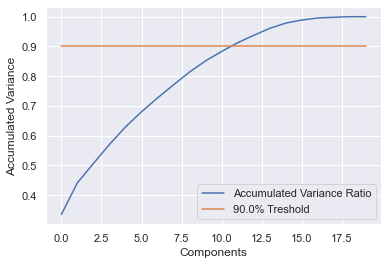

In [28]:
X_single_values_train_pca, X_single_values_test_pca, pca_single_values = get_PCA(X_single_values_train, X_single_values_test, 0.9)

In [29]:
X_single_values_train_pca.shape

(46521, 11)

In [30]:
len(X_single_values_train_pca)+len(X_single_values_test_pca)

58152

In [31]:
X_single_values.shape

(58152, 20)

### 5 days mean value

#### Prepare the dataset

In [32]:
mean_5_games_df.columns

Index(['Minutes played', 'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Player Efficiency Ratings',
       'Double-double', 'Triple-double', 'Draftkings next game score',
       'Player ID', 'Player Name', 'Reference Date', 'Draftkings score'],
      dtype='object')

In [33]:
columns_to_drop = ['Player ID', 'Player Name', 'Reference Date', 
    'Draftkings score', 'Draftkings next game score']

In [34]:
y_mean_5_games = mean_5_games_df['Draftkings next game score']
X_mean_5_games = mean_5_games_df.drop(columns_to_drop, axis=1)
X_mean_5_games.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double
0,24.6,5.6,9.6,0.2,0.8,2.8,4.6,2.4,4.6,1.4,0.8,1.2,2.0,2.8,14.2,26.0624,0.0,0.0
1,28.0,6.0,11.2,0.4,2.0,2.8,4.2,2.8,4.6,1.0,0.6,1.2,2.2,3.2,15.2,24.7008,0.0,0.0
2,30.6,3.6,8.4,2.8,6.6,0.4,0.4,0.4,4.2,1.6,1.0,1.2,0.6,2.2,10.4,21.2246,0.0,0.0


#### Split the dataset

In [35]:
X_mean_5_games_train, X_mean_5_games_test, y_mean_5_games_train, y_mean_5_games_test = train_test_split(X_mean_5_games, y_mean_5_games, test_size=0.2, random_state=0)

#### Standard Scaler

In [36]:
scaler_mean_5_games = StandardScaler()
X_mean_5_games_train = scaler_mean_5_games.fit_transform(X_mean_5_games_train)
X_mean_5_games_test = scaler_mean_5_games.transform(X_mean_5_games_test)

#### PCA

Original number of features: 18
Number of components: 7
Number of components: 90.35%


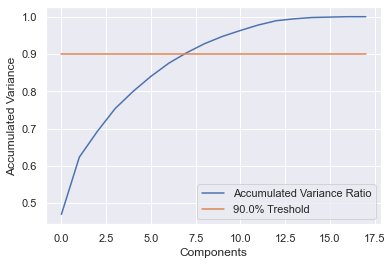

In [37]:
X_mean_5_games_train_pca, X_mean_5_games_test_pca, pca_mean_5_games = get_PCA(X_mean_5_games_train, X_mean_5_games_test, 0.9)

### 10 days mean value

#### Prepare the dataset

In [38]:
mean_10_games_df.columns

Index(['Minutes played', 'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Player Efficiency Ratings',
       'Double-double', 'Triple-double', 'Draftkings next game score',
       'Player ID', 'Player Name', 'Reference Date', 'Draftkings score'],
      dtype='object')

In [39]:
columns_to_drop = ['Player ID', 'Player Name', 'Reference Date', 
    'Draftkings score', 'Draftkings next game score']

In [40]:
y_mean_10_games = mean_10_games_df['Draftkings next game score']
X_mean_10_games = mean_10_games_df.drop(columns_to_drop, axis=1)
X_mean_10_games.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double
0,2.6,0.6,1.3,0.1,0.4,0.3,0.8,0.3,0.8,0.0,0.0,0.1,0.1,0.1,1.6,21.0921,0.0,0.0
1,2.6,0.6,1.2,0.1,0.3,0.3,0.6,0.3,0.7,0.0,0.0,0.2,0.0,0.2,1.6,27.0843,0.0,0.0
2,2.7,0.4,0.8,0.1,0.4,0.3,0.6,0.0,0.6,0.1,0.0,0.2,0.0,0.3,1.2,21.1961,0.0,0.0


#### Split the dataset

In [41]:
X_mean_10_games_train, X_mean_10_games_test, y_mean_10_games_train, y_mean_10_games_test = train_test_split(X_mean_10_games, y_mean_10_games, test_size=0.2, random_state=0)

#### Standard Scaler

In [42]:
scaler_mean_10_games = StandardScaler()
X_mean_10_games_train = scaler_mean_10_games.fit_transform(X_mean_10_games_train)
X_mean_10_games_test = scaler_mean_10_games.transform(X_mean_10_games_test)

#### PCA

Original number of features: 18
Number of components: 6
Number of components: 90.12%


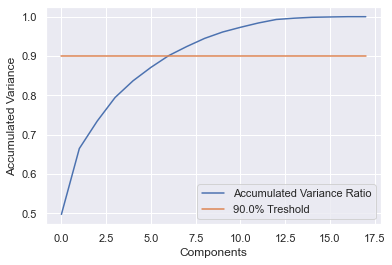

In [44]:
X_mean_10_games_train_pca, X_mean_10_games_test_pca, pca_mean_10_games = get_PCA(X_mean_10_games_train, X_mean_10_games_test, 0.9)

## Save the datasets

### Single values

#### Pickle

In [46]:
# import pickle
# import pandas as pd

# # Scaler
# with open('Datasets/PCA/scaler_single_values.pkl', 'wb') as f:
#     pickle.dump(scaler_single_values, f)

# # X_train
# with open('Datasets/PCA/X_single_values_train_pca.pkl', 'wb') as f:
#     pickle.dump(X_single_values_train_pca, f)

# # X_test
# with open('Datasets/PCA/X_single_values_test_pca.pkl', 'wb') as f:
#     pickle.dump(X_single_values_test_pca, f)

# # y_train
# with open('Datasets/PCA/y_single_values_train.pkl', 'wb') as f:
#     pickle.dump(y_single_values_train, f)

# # y_test
# with open('Datasets/PCA/y_single_values_test.pkl', 'wb') as f:
#     pickle.dump(y_single_values_test, f)

# # PCA
# with open('Datasets/PCA/pca_single_values.pkl', 'wb') as f:
#     pickle.dump(pca_single_values, f)

#### Unpickle

In [ ]:
import pickle
import pandas as pd

# Scaler
# with open('Datasets/PCA/scaler_single_values.pkl', 'rb') as f:
    # scaler_single_values = pickle.load(f)

# X_train
# with open('Datasets/PCA/X_single_values_train_pca.pkl', 'rb') as f:
    # X_single_values_train_pca = pickle.load(f)

# X_test
# with open('Datasets/PCA/X_single_values_test_pca.pkl', 'rb') as f:
    # X_single_values_test_pca = pickle.load(f)

# y_train
# with open('Datasets/PCA/y_single_values_train.pkl', 'rb') as f:
    # y_single_values_train = pickle.load(f)

# y_test
# with open('Datasets/PCA/y_single_values_test.pkl', 'rb') as f:
    # y_single_values_test = pickle.load(f)

# PCA
# with open('Datasets/PCA/pca_single_values.pkl', 'rb') as f:
    # pca_single_values = pickle.load(f)

### Mean - 5 games

#### Pickle

In [47]:
# import pickle
# import pandas as pd

# # Scaler
# with open('Datasets/PCA/scaler_mean_5_games.pkl', 'wb') as f:
#     pickle.dump(scaler_mean_5_games, f)

# # X_train
# with open('Datasets/PCA/X_mean_5_games_train_pca.pkl', 'wb') as f:
#     pickle.dump(X_mean_5_games_train_pca, f)

# # X_test
# with open('Datasets/PCA/X_mean_5_games_test_pca.pkl', 'wb') as f:
#     pickle.dump(X_mean_5_games_test_pca, f)

# # y_train
# with open('Datasets/PCA/y_mean_5_games_train.pkl', 'wb') as f:
#     pickle.dump(y_mean_5_games_train, f)

# # y_test
# with open('Datasets/PCA/y_mean_5_games_test.pkl', 'wb') as f:
#     pickle.dump(y_mean_5_games_test, f)

# # PCA
# with open('Datasets/PCA/pca_mean_5_games.pkl', 'wb') as f:
#     pickle.dump(pca_mean_5_games, f)

#### Unpickle

In [ ]:
import pickle
import pandas as pd

# Scaler
# with open('Datasets/PCA/scaler_mean_5_games.pkl', 'rb') as f:
    # scaler_mean_5_games = pickle.load(f)

# X_train
# with open('Datasets/PCA/X_mean_5_games_train_pca.pkl', 'rb') as f:
    # X_mean_5_games_train_pca = pickle.load(f)

# X_test
# with open('Datasets/PCA/X_mean_5_games_test_pca.pkl', 'rb') as f:
    # X_mean_5_games_test_pca = pickle.load(f)

# y_train
# with open('Datasets/PCA/y_mean_5_games_train.pkl', 'rb') as f:
    # y_mean_5_games_train = pickle.load(f)

# y_test
# with open('Datasets/PCA/y_mean_5_games_test.pkl', 'rb') as f:
    # y_mean_5_games_test = pickle.load(f)

# PCA
# with open('Datasets/PCA/pca_mean_5_games.pkl', 'rb') as f:
    # pca_mean_5_games = pickle.load(f)

### Mean - 10 games

#### Pickle

In [48]:
# import pickle
# import pandas as pd

# # Scaler
# with open('Datasets/PCA/scaler_mean_10_games.pkl', 'wb') as f:
#     pickle.dump(scaler_mean_10_games, f)

# # X_train
# with open('Datasets/PCA/X_mean_10_games_train_pca.pkl', 'wb') as f:
#     pickle.dump(X_mean_10_games_train_pca, f)

# # X_test
# with open('Datasets/PCA/X_mean_10_games_test_pca.pkl', 'wb') as f:
#     pickle.dump(X_mean_10_games_test_pca, f)

# # y_train
# with open('Datasets/PCA/y_mean_10_games_train.pkl', 'wb') as f:
#     pickle.dump(y_mean_10_games_train, f)

# # y_test
# with open('Datasets/PCA/y_mean_10_games_test.pkl', 'wb') as f:
#     pickle.dump(y_mean_10_games_test, f)

# # PCA
# with open('Datasets/PCA/pca_mean_10_games.pkl', 'wb') as f:
#     pickle.dump(pca_mean_10_games, f)

#### Unpickle

In [ ]:
import pickle
import pandas as pd

# Scaler
# with open('Datasets/PCA/scaler_mean_10_games.pkl', 'rb') as f:
    # scaler_mean_10_games = pickle.load(f)

# X_train
# with open('Datasets/PCA/X_mean_10_games_train_pca.pkl', 'rb') as f:
    # X_mean_10_games_train_pca = pickle.load(f)

# X_test
# with open('Datasets/PCA/X_mean_10_games_test_pca.pkl', 'rb') as f:
    # X_mean_10_games_test_pca = pickle.load(f)

# y_train
# with open('Datasets/PCA/y_mean_10_games_train.pkl', 'rb') as f:
    # y_mean_10_games_train = pickle.load(f)

# y_test
# with open('Datasets/PCA/y_mean_10_games_test.pkl', 'rb') as f:
    # y_mean_10_games_test = pickle.load(f)

# PCA
# with open('Datasets/PCA/pca_mean_10_games.pkl', 'rb') as f:
    # pca_mean_10_games = pickle.load(f)